# MACHINE LEARNING LAB

# SIMRAN KAUR

# 311443

# LAB 7

# Exercise 0: Dataset Preprocessing

In [133]:
import pandas as pd
import numpy as np
from scipy import spatial
from scipy.spatial import distance
import matplotlib.pyplot as plt
import random
import os

First we will merge training and test sets into one dataframe and if its entries are not null, directly append that dataframe to a list of dataframes or if the length of different time series in a same dataframe are not equal then check after zero padding if its still null.

Create another list which stores all dataframes with missing values for further computation on them.

In [134]:
 def get_dataframe():
    get_df = []            # list containing dataframes
    missing_df = []                    # list containing dataframes with missing values
    directory_name_df = []                              # list containing name of dataframes
    missing_name_df = []                                            # list containing name of dataframes having missing values
                              # the name list are just for knowing which dataframe we are working with
    main = 'C:\\Users\\simra\\Downloads\\UCRArchive_2018\\UCRArchive_2018\\'
    directory = os.scandir(main)
    for i in directory:
        newpath = os.path.join(i)
        trainpath = newpath + "\\" + newpath.split("\\")[-1] + "_TRAIN.tsv"
        testpath = newpath + "\\" + newpath.split("\\")[-1] + "_TEST.tsv"
        traindf = pd.read_csv(trainpath, sep = "\t", header = None)
        testdf = pd.read_csv(testpath, sep = "\t", header = None)
        newdf = traindf.append(testdf,ignore_index = True)
        if newdf.isnull().values.any():                # to check if length of time series is not same across entire dataframe
            X = newdf.to_numpy()
            m, n = np.shape(X)
            for k in range(m):
                for j in range(n-1, -1, -1):              # padding the time series with zeros
                    if np.isnan(X[k][j]):
                        X[k][j] = 0
                    else:
                        break
            if np.isnan(np.sum(X)):                      # to check if dataframe has still any null values
                missing_df.append(pd.DataFrame(X))                       # append it to list of dataframe having missing values
                missing_name_df.append(newpath.split("\\")[-1])
            else:
                get_df.append(pd.DataFrame(X))
                directory_name_df.append(newpath.split("\\")[-1])
        else:        
            get_df.append(pd.DataFrame(newdf))
            directory_name_df.append(newpath.split("\\")[-1])
    return get_df, missing_df, directory_name_df, missing_name_df


I have made two major lists containing

1 List containing all dataframes other than the one that have missing values

2 List containing dataframes that have missing values and will be imputed using KNN

In [197]:
list_dfs, list_missing_dfs, list_df_names, list_missing_names = get_dataframe()

Let's print one of the item of list_dfs to check if it's giving dataframe

In [136]:
print(list_df_names[0])
list_dfs[0]

ACSF1


,0,1,2,3,4,5,6,7,8,9,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
0,9,-0.584754,-0.584754,1.730991,-0.584754,-0.584754,-0.584754,1.729917,-0.584754,-0.584754,...,1.732726,-0.584734,-0.583729,-0.578603,1.732726,-0.584734,-0.583729,-0.578603,1.732726,-0.584734
1,9,-0.591434,-0.511104,1.726820,-0.580422,-0.591434,-0.511104,1.727921,-0.580422,-0.591434,...,1.727396,-0.580731,-0.580731,-0.580731,1.727396,-0.580731,-0.580731,-0.580731,1.727396,-0.580731
2,9,-0.577945,-0.577945,1.730793,-0.577945,-0.578946,-0.564882,1.731094,-0.577829,-0.580956,...,1.734727,-0.577751,-0.580956,-0.549798,1.734727,-0.577751,-0.580956,-0.549798,1.734727,-0.577751
3,9,-0.588925,-0.538088,1.735718,-0.588716,-0.589962,-0.523551,1.735619,-0.588646,-0.588925,...,1.743664,-0.588876,-0.586852,-0.576483,1.743664,-0.588876,-0.586852,-0.576483,1.743664,-0.588876
4,9,-0.596633,-0.532188,1.718067,-0.592117,-0.596633,-0.532188,1.715241,-0.592117,-0.595605,...,1.743258,-0.592403,-0.591524,-0.575158,1.743258,-0.592403,-0.591524,-0.575158,1.743258,-0.592403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,-0.865824,0.116534,1.665577,-0.664466,-0.668138,-0.668138,1.667320,-0.668138,-0.668138,...,1.672843,-0.664985,-0.842507,0.008064,1.672843,-0.664985,-0.842507,0.008064,1.672843,-0.664985
196,1,-0.631937,-0.631937,1.612754,-0.631937,-0.631937,-0.631937,1.602539,-0.631937,-0.631937,...,1.573765,-0.628213,-1.017398,0.088009,1.573765,-0.628213,-1.017398,0.088009,1.573765,-0.628213
197,1,-0.997077,0.108756,1.585963,-0.695920,-0.996043,0.106678,1.585752,-0.695931,-0.994998,...,1.589317,-0.695931,-0.996043,0.106678,1.589317,-0.695931,-0.996043,0.106678,1.589317,-0.695931
198,1,-0.891590,-0.752940,1.424231,-0.752324,-0.891590,-0.751933,1.421933,-0.752324,-0.892596,...,1.431407,-0.747132,-1.069707,0.481769,1.431407,-0.747132,-1.069707,0.481769,1.431407,-0.747132


Similar for the list_missing_dfs

In [137]:
print(list_missing_names[1])
list_missing_dfs[1]

DodgerLoopGame


,0,1,2,3,4,5,6,7,8,9,...,279,280,281,282,283,284,285,286,287,288
0,1.0,7.0,3.0,6.0,11.0,8.0,6.0,6.0,10.0,4.0,...,12.0,5.0,9.0,4.0,4.0,6.0,9.0,5.0,16.0,8.0
1,1.0,9.0,10.0,5.0,7.0,10.0,9.0,5.0,6.0,8.0,...,8.0,5.0,4.0,8.0,6.0,11.0,5.0,8.0,9.0,6.0
2,1.0,12.0,18.0,11.0,11.0,19.0,17.0,4.0,6.0,8.0,...,10.0,9.0,11.0,8.0,4.0,7.0,3.0,6.0,3.0,6.0
3,1.0,11.0,9.0,11.0,12.0,8.0,8.0,5.0,8.0,8.0,...,17.0,16.0,10.0,7.0,10.0,11.0,12.0,13.0,7.0,10.0
4,1.0,12.0,9.0,11.0,7.0,12.0,14.0,10.0,10.0,10.0,...,4.0,7.0,9.0,11.0,6.0,9.0,7.0,10.0,4.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,2.0,17.0,11.0,9.0,16.0,10.0,4.0,10.0,13.0,7.0,...,7.0,9.0,12.0,4.0,5.0,4.0,10.0,6.0,4.0,3.0
154,2.0,18.0,12.0,14.0,13.0,8.0,7.0,7.0,6.0,13.0,...,28.0,24.0,11.0,20.0,28.0,20.0,22.0,19.0,16.0,24.0
155,2.0,7.0,6.0,5.0,4.0,6.0,3.0,8.0,4.0,5.0,...,10.0,9.0,7.0,9.0,11.0,9.0,12.0,6.0,5.0,6.0
156,2.0,14.0,10.0,10.0,7.0,10.0,5.0,11.0,9.0,11.0,...,14.0,4.0,9.0,2.0,15.0,7.0,12.0,3.0,6.0,6.0


To confirm if there are still any rows having missing values.

In [138]:
null_data = list_missing_dfs[1][list_missing_dfs[1].isnull().any(axis=1)]
null_data

,0,1,2,3,4,5,6,7,8,9,...,279,280,281,282,283,284,285,286,287,288
7,1.0,9.0,5.0,1.0,4.0,2.0,6.0,7.0,2.0,7.0,...,13.0,12.0,9.0,12.0,18.0,10.0,17.0,9.0,15.0,10.0
15,2.0,5.0,4.0,6.0,8.0,2.0,4.0,6.0,2.0,1.0,...,10.0,13.0,17.0,11.0,11.0,11.0,12.0,8.0,3.0,6.0
19,2.0,7.0,5.0,5.0,5.0,0.0,5.0,1.0,7.0,7.0,...,11.0,9.0,8.0,6.0,7.0,6.0,7.0,7.0,10.0,7.0
27,1.0,6.0,9.0,2.0,2.0,3.0,10.0,7.0,7.0,3.0,...,8.0,12.0,10.0,14.0,11.0,6.0,8.0,7.0,12.0,7.0
33,1.0,4.0,6.0,8.0,4.0,2.0,4.0,1.0,10.0,5.0,...,15.0,6.0,3.0,11.0,7.0,7.0,4.0,2.0,4.0,4.0
41,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,13.0,14.0,9.0,19.0,9.0,4.0,11.0,5.0,13.0
42,1.0,5.0,4.0,6.0,6.0,5.0,6.0,4.0,10.0,11.0,...,12.0,20.0,16.0,17.0,12.0,6.0,12.0,14.0,11.0,12.0
52,1.0,8.0,3.0,11.0,7.0,9.0,7.0,7.0,1.0,4.0,...,8.0,10.0,11.0,10.0,6.0,5.0,5.0,9.0,4.0,3.0
57,1.0,16.0,11.0,3.0,10.0,11.0,3.0,6.0,6.0,2.0,...,8.0,14.0,9.0,12.0,8.0,7.0,8.0,10.0,2.0,11.0
77,1.0,9.0,5.0,7.0,3.0,6.0,1.0,6.0,6.0,1.0,...,19.0,9.0,13.0,8.0,9.0,7.0,8.0,6.0,8.0,7.0


Re-split and standardize dataframes along with putting equal ratios of all classes in the train, validation and test set using stratification.

In [139]:
def resplit_std(dfs):     
    n_df = dfs.iloc[:, 1:]              
    std_df = (n_df - n_df.mean())/n_df.std()
    std_df.insert(loc = 0, column = 0, value = dfs.iloc[:, 0])
    
    std_df = std_df.rename(columns={0: "Y"})
    list_unique = std_df['Y'].unique()           # list containing all unique classes
    finalTrain = []
    finalVal = []
    finalTest = []
    train = []

    for l in list_unique:
        dataFrameWithl = std_df.loc[std_df['Y'] == l].to_numpy()
        r = dataFrameWithl.shape[0]
        size = int(0.7*r)
        
        train = dataFrameWithl[0:size, :]
        if(len(finalTrain) > 0):

            finalTrain = np.concatenate((finalTrain, train), axis=0)
        else:
            finalTrain = train
            
        val = dataFrameWithl[size: size + int( 0.15*r), : ]
        if(len(finalVal) > 0):
            finalVal =np.concatenate((finalVal, val), axis=0)
        else:
            finalVal = val   
            
        test = dataFrameWithl[size + int( 0.15*r):, :]
        if(len(finalTest) > 0):
            finalTest = np.concatenate((finalTest, test), axis=0)
        else:
            finalTest = test
        
    return finalTrain, finalVal, finalTest

Plot indicating the total length of samples (across all datasets)

In [141]:
local_list_names = list_df_names + list_missing_names        # list containing names of all dataframes

In [142]:
local_list_dfs = list_dfs[:]                         # list containing all dataframes
local_list_dfs.extend(list_missing_dfs)

In [143]:
yaxis = []
for d_f in local_list_dfs:
    yaxis.append(d_f.shape[0])

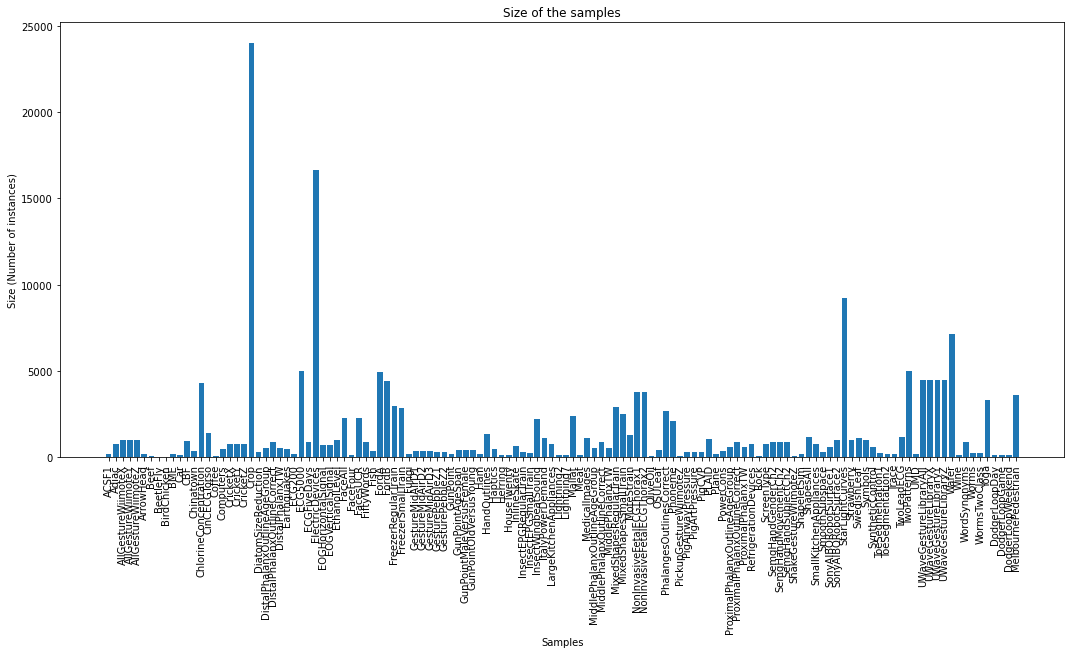

In [294]:
plt.figure(figsize = (18, 8))
plt.bar(local_list_names, yaxis)
plt.xticks(rotation = 90)
plt.title('Size of the samples')
plt.xlabel('Samples')
plt.ylabel('Size (Number of instances)')
plt.show()

In [295]:
zaxis = []
for d_f in local_list_dfs:
    zaxis.append(d_f.shape[1])

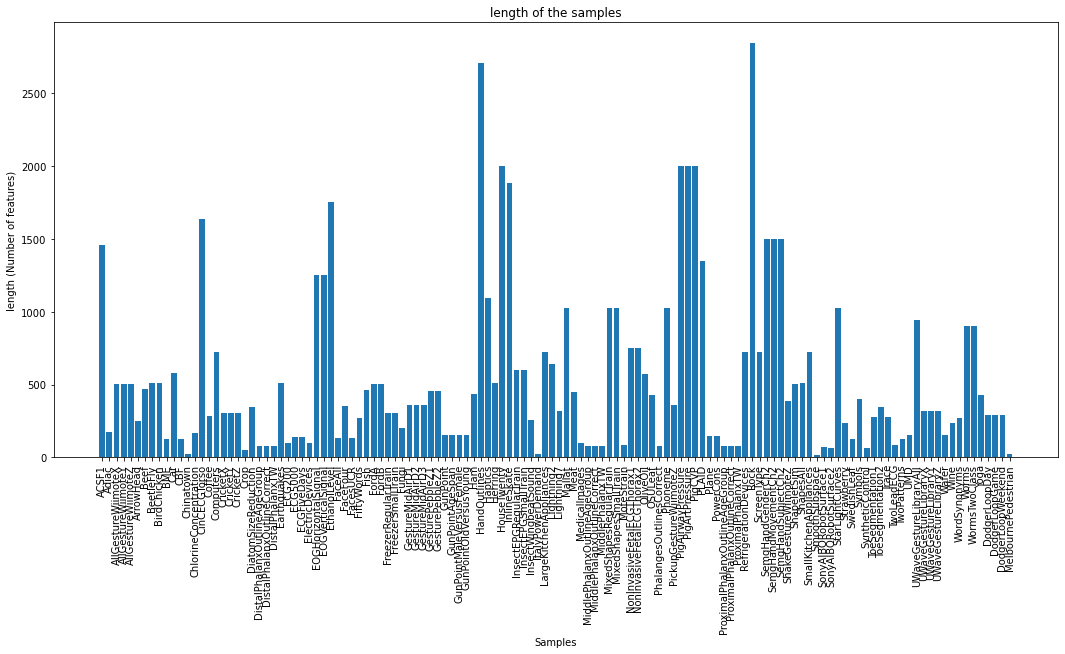

In [296]:
plt.figure(figsize = (18, 8))
plt.bar(local_list_names, zaxis)
plt.xticks(rotation = 90)
plt.title('length of the samples')
plt.xlabel('Samples')
plt.ylabel('length (Number of features)')
plt.show()

Plot the number of Classes in each dataframe. 

In [145]:
classes_df = []
for e_df in local_list_dfs:
    classes_df.append(e_df[:][0].nunique())

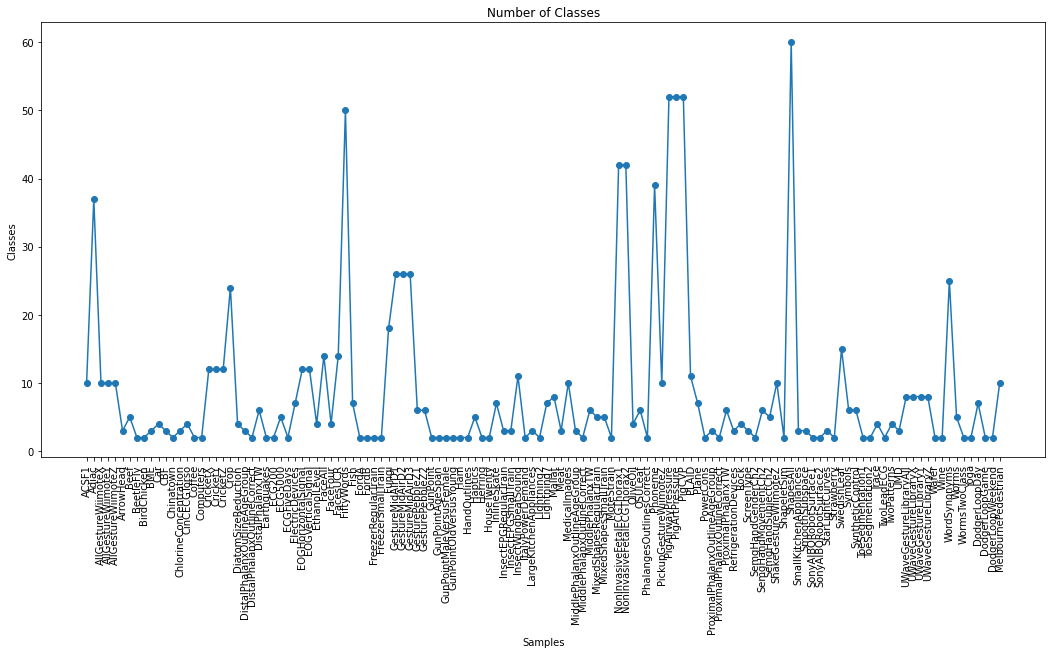

In [302]:
plt.figure(figsize = (18, 8))
plt.plot(local_list_names, classes_df, '-o')
plt.xticks(rotation = 90)
plt.title('Number of Classes')
plt.xlabel('Samples')
plt.ylabel('Classes')
plt.show()


# Exercise 1: Dataset Imputation with KNN

Datasets with missing values

In [147]:
list_missing_names

['DodgerLoopDay', 'DodgerLoopGame', 'DodgerLoopWeekend', 'MelbournePedestrian']

In [155]:
def avg_KNN(data, target, p, K):               # p gives rows which has null values
                                                         # data = entire dataframe except column that has null values
                                                                # target = column of dataframe that has null values
    l_dist = []     # list containing distances of query point from training set
    X = data.to_numpy()
    Y = target.to_numpy().reshape(-1,1)
    m, n = np.shape(X)
    for i in [x for x in range(m) if x != p]:
        s = 0
        for j in [x for x in range(n) if  str(X[i, x]) != 'nan']:
            s += (X[p, j] - X[i, j])**2
        s = s**(0.5)    
        l_dist.append([i, s])
    l_dist.sort(key = lambda x : x[1])  
    K_dist = 0
    for l in range(K):
        K_dist += Y[l_dist[l][0]][0]            # add first K values that are nearest to missing value
    return K_dist/K                                       # returns the average

def dataset_imputation(df, K):
    X = df.to_numpy()
    m, n = np.shape(X)
    for i in range(m):
        for j in range(n):
            l = [k for k in range(n) if k != j]
            if np.isnan(X[i, j]):
                X[i, j] = avg_KNN(df.iloc[:, l], df.iloc[:, j], i, K)
    return pd.DataFrame(X)            
    

In [156]:
def knn_classifier(train, val, k_clas):
    sample = train[:, 1:]                     # stores all of the train except labels
    query = val[:, 1:]                               # stores all of the validation except labels
    l_dist = []     # list containing distances 
    index = []            # list containing indices
    acc_k = []                      # list containing accuracy with each k
    m, n = np.shape(sample)
    for K in k_clas:
        acc = 0
        for h in range(len(query)):
            for i in range(m):
                s = 0
                for j in range(n):
                    s += (query[h, j] - sample[i, j])**2
                s = s**(0.5)    
                l_dist.append([s, i])
            index = [k for l, k in sorted(l_dist, key = lambda x:x[0])][:K]
            pred = [train[indx, 0] for indx in index]                  # predicting classes for thr validation set
            if max(set(pred), key = pred.count) == val[h, 0]:
                acc += 1
        acc_k.append([(acc/query.shape[0])*100, K])  
    return max(acc_k)

We have made two functions above

one for data imputation which uses KNN to replace missing values with the average of values nearest to it

second is for classification

Now we will use different values of K in KNN to find the one which gives best accuracy.

In [195]:
def tune_K(df):
    k_imp = [1, 3, 5, 8]
    k_clas = [1, 2, 3, 4, 5]
    k_acc = []
    if df.isnull().values.any():
        for K in k_imp:
            new_df = dataset_imputation(df, K)
            train, val, test = resplit_std(new_df)
            acc, k_cc = knn_classifier(train, val, k_clas)
            k_acc.append([acc, K, k_cc])
        k_acc = max(k_acc)   
    else:
        train, val, test = resplit_std(df)
        ac, k_c = knn_classifier(train, val, k_clas)
        k_acc = [ac, k_c]
    return k_acc      
    

Let's find the accuracy of some randomly selected dataframes firstly on validation.

In [160]:
print(f'For the dataframe: {list_df_names[5]}')
acc_df5, k_df5 = tune_K(list_dfs[5])
print(f'Best accuaracy {acc_df5} when K = {k_df5}')

For the dataframe: ArrowHead
Best accuaracy 53.333333333333336 when K = 1


With this best selected K lets check the accuaracy of classifier on test.

In [164]:
print(f'For the dataframe: {list_df_names[5]}')
train_df5, val_df5, test_df5 = resplit_std(list_dfs[5])
nAcc_df5, nK_df5 =  knn_classifier(train_df5, test_df5, [k_df5])
print(f'Accuaracy on the test {nAcc_df5} when K = {nK_df5}')

For the dataframe: ArrowHead
Accuaracy on the test 51.42857142857142 when K = 1


In [165]:
print(f'For the dataframe: {list_df_names[10]}')
acc_df10, k_df10 = tune_K(list_dfs[10])
print(f'Best accuaracy {acc_df10} when K = {k_df10}')

For the dataframe: Car
Best accuaracy 50.0 when K = 1


In [167]:
print(f'For the dataframe: {list_df_names[10]}')
train_df10, val_df10, test_df10 = resplit_std(list_dfs[10])
nAcc_df10, nK_df10 = knn_classifier(train_df10, test_df10, [k_df10])
print(f'Accuaracy on the test {nAcc_df10} when K = {nK_df10}')

For the dataframe: Car
Accuaracy on the test 55.00000000000001 when K = 1


In [168]:
print(f'For the dataframe: {list_df_names[25]}')
acc_df25, k_df25 = tune_K(list_dfs[25])
print(f'Best accuaracy {acc_df25} when K = {k_df25}')

For the dataframe: Earthquakes
Best accuaracy 80.88235294117648 when K = 5


In [169]:
print(f'For the dataframe: {list_df_names[25]}')
train_df25, val_df25, test_df25 = resplit_std(list_dfs[25])
nAcc_df25, nK_df25 = knn_classifier(train_df25, test_df25, [k_df25])
print(f'Accuaracy on the test {nAcc_df25} when K = {nK_df25}')

For the dataframe: Earthquakes
Accuaracy on the test 78.87323943661971 when K = 5


In [170]:
print(f'For the dataframe: {list_df_names[45]}')
acc_df45, k_df45 = tune_K(list_dfs[45])
print(f'Best accuaracy {acc_df45} when K = {k_df45}')

For the dataframe: GestureMidAirD3
Best accuaracy 3.8461538461538463 when K = 5


In [171]:
print(f'For the dataframe: {list_df_names[45]}')
train_df45, val_df45, test_df45 = resplit_std(list_dfs[45])
nAcc_df45, nK_df45 = knn_classifier(train_df45, test_df45, [k_df45])
print(f'Accuaracy on the test {nAcc_df45} when K = {nK_df45}')

For the dataframe: GestureMidAirD3
Accuaracy on the test 10.256410256410255 when K = 5


In [172]:
print(f'For the dataframe: {list_df_names[58]}')
acc_df58, k_df58 = tune_K(list_dfs[58])
print(f'Best accuaracy {acc_df58} when K = {k_df58}')

For the dataframe: InsectEPGRegularTrain
Best accuaracy 84.44444444444444 when K = 1


In [173]:
print(f'For the dataframe: {list_df_names[58]}')
train_df58, val_df58, test_df58 = resplit_std(list_dfs[58])
nAcc_df58, nK_df58 = knn_classifier(train_df58, test_df58, [k_df58])
print(f'Accuaracy on the test {nAcc_df58} when K = {nK_df58}')

For the dataframe: InsectEPGRegularTrain
Accuaracy on the test 74.0 when K = 1


In [174]:
print(f'For the dataframe: {list_df_names[62]}')
acc_df62, k_df62 = tune_K(list_dfs[62])
print(f'Best accuaracy {acc_df62} when K = {k_df62}')

For the dataframe: LargeKitchenAppliances
Best accuaracy 57.65765765765766 when K = 2


In [175]:
print(f'For the dataframe: {list_df_names[62]}')
train_df62, val_df62, test_df62 = resplit_std(list_dfs[62])
nAcc_df62, nK_df62 = knn_classifier(train_df62, test_df62, [k_df62])
print(f'Accuaracy on the test {nAcc_df62} when K = {nK_df62}')

For the dataframe: LargeKitchenAppliances
Accuaracy on the test 36.84210526315789 when K = 2


In [176]:
print(f'For the dataframe: {list_df_names[85]}')
acc_df85, k_df85 = tune_K(list_dfs[85])
print(f'Best accuaracy {acc_df85} when K = {k_df85}')

For the dataframe: Plane
Best accuaracy 14.285714285714285 when K = 5


In [177]:
print(f'For the dataframe: {list_df_names[85]}')
train_df85, val_df85, test_df85 = resplit_std(list_dfs[85])
nAcc_df85, nK_df85 = knn_classifier(train_df85, test_df85, [k_df85])
print(f'Accuaracy on the test {nAcc_df85} when K = {nK_df85}')

For the dataframe: Plane
Accuaracy on the test 20.0 when K = 5


In [178]:
print(f'For the dataframe: {list_df_names[95]}')
acc_df95, k_df95 = tune_K(list_dfs[95])
print(f'Best accuaracy {acc_df95} when K = {k_df95}')

For the dataframe: SemgHandSubjectCh2
Best accuaracy 35.55555555555556 when K = 1


In [179]:
print(f'For the dataframe: {list_df_names[95]}')
train_df95, val_df95, test_df95 = resplit_std(list_dfs[95])
nAcc_df95, nK_df95 = knn_classifier(train_df95, test_df95, [k_df95])
print(f'Accuaracy on the test {nAcc_df95} when K = {nK_df95}')

For the dataframe: SemgHandSubjectCh2
Accuaracy on the test 24.285714285714285 when K = 1


In [180]:
print(f'For the dataframe: {list_df_names[102]}')
acc_df102, k_df102 = tune_K(list_dfs[102])
print(f'Best accuaracy {acc_df102} when K = {k_df102}')

For the dataframe: SonyAIBORobotSurface2
Best accuaracy 61.64383561643836 when K = 5


In [181]:
print(f'For the dataframe: {list_df_names[102]}')
train_df102, val_df102, test_df102 = resplit_std(list_dfs[102])
nAcc_df102, nK_df102 = knn_classifier(train_df102, test_df102, [k_df102])
print(f'Accuaracy on the test {nAcc_df102} when K = {nK_df102}')

For the dataframe: SonyAIBORobotSurface2
Accuaracy on the test 61.74496644295302 when K = 5


Now for the dataframes that had missing values, we will impute the values with different K's and then check the accuaracy of the classifier on the validation to select the best k.

In [198]:
print(f'For the dataframe: {list_missing_names[0]}')
Macc_df0, Mimpk_df0, Mclak_df0 = tune_K(list_missing_dfs[0])
print(f'Best accuaracy {Macc_df0} when K for imputation = {Mimpk_df0} and k for classification = {Mclak_df0}')

For the dataframe: DodgerLoopDay
Best accuaracy 42.857142857142854 when K for imputation = 8 and k for classification = 1


In [200]:
print(f'For the dataframe: {list_missing_names[0]}')
Mtrain_df0, Mval_df0, Mtest_df0 = resplit_std(dataset_imputation(list_missing_dfs[0], Mimpk_df0))
MnAcc_df0, MnK_df0 = knn_classifier(Mtrain_df0, Mtest_df0, [Mclak_df0])
print(f'Accuaracy on the test {MnAcc_df0} when k for classification = {MnK_df0}')

For the dataframe: DodgerLoopDay
Accuaracy on the test 13.333333333333334 when k for classification = 1


In [201]:
print(f'For the dataframe: {list_missing_names[1]}')
Macc_df1, Mimpk_df1, Mclak_df1 = tune_K(list_missing_dfs[1])
print(f'Best accuaracy {Macc_df1} when K for imputation = {Mimpk_df1} and k for classification = {Mclak_df1}')

For the dataframe: DodgerLoopGame
Best accuaracy 52.17391304347826 when K for imputation = 8 and k for classification = 5


In [202]:
print(f'For the dataframe: {list_missing_names[1]}')
Mtrain_df1, Mval_df1, Mtest_df1 = resplit_std(dataset_imputation(list_missing_dfs[1], Mimpk_df1))
MnAcc_df1, MnK_df1 = knn_classifier(Mtrain_df1, Mtest_df1, [Mclak_df1])
print(f'Accuaracy on the test {MnAcc_df1} when k for classification = {MnK_df1}')

For the dataframe: DodgerLoopGame
Accuaracy on the test 52.0 when k for classification = 5


In [203]:
print(f'For the dataframe: {list_missing_names[2]}')
Macc_df2, Mimpk_df2, Mclak_df2 = tune_K(list_missing_dfs[2])
print(f'Best accuaracy {Macc_df2} when K for imputation = {Mimpk_df2} and k for classification = {Mclak_df2}')

For the dataframe: DodgerLoopWeekend
Best accuaracy 72.72727272727273 when K for imputation = 8 and k for classification = 5


In [204]:
print(f'For the dataframe: {list_missing_names[2]}')
Mtrain_df2, Mval_df2, Mtest_df2 = resplit_std(dataset_imputation(list_missing_dfs[2], Mimpk_df2))
MnAcc_df2, MnK_df2 = knn_classifier(Mtrain_df2, Mtest_df2, [Mclak_df2])
print(f'Accuaracy on the test {MnAcc_df2} when k for classification = {MnK_df2}')

For the dataframe: DodgerLoopWeekend
Accuaracy on the test 69.23076923076923 when k for classification = 5


Above we have tested various datasets from our repository and checked for various values of K for classification and reported the final test accuracy on the optimal k.

# Exercise 2: Time Series Classification with Various Distance Measures

For different values of K in knn and different distance metric, we will find the accuracy on the validation set in order to get the optimal K and distance for which accuracy is highest. Then with this K and distance function we will calculate the accuracy on the test set.

In [292]:
distance_metric = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'dice', 'euclidean',
                       'hamming', 'jaccard', 'jensenshannon', 'kulsinski', 'matching', 'minkowski', 
                       'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule']

knn = [2, 5, 8]

def optimalDistance_K(train, val, k_nn, dist):
    grid = [[kn, dis] for kn in k_nn for dis in dist]
    
    sample = train[:, 1:]
    query = val[:, 1:]
    m, n = np.shape(sample)
    acc_k = []
    for K, d in grid:
        acc = 0
        for h in range(len(query)):
            pred = []
            l_dist = []           # list containing distances
            X = np.vstack([query[h, :].reshape(1,n), sample])
            for i in range(X.shape[0]-1):
                l_dist.append([distance.pdist(X, d)[i], i])     
            index = [k for l, k in sorted(l_dist, key = lambda x:x[0])][:K]
            pred = [train[indx, 0] for indx in index]
            if max(set(pred), key = pred.count) == val[h, 0]:
                acc += 1   
        acc_k.append([(acc/query.shape[0])*100, d, K])
    return max(acc_k)
    

For the list of distances defined above and values of k for knn, we will check the accuracy of the datasets on test by using the best k and best distance metric found by tuning k and distance on the validation set.

In [293]:
print(f'For the dataframe: {list_df_names[0]}')
odTrain_df0, odVal_df0, odTest_df0 = resplit_std(list_dfs[0])
opt_acc_df0, opt_dist_df0, opt_k_df0 = optimalDistance_K(odTrain_df0, odVal_df0, knn, distance_metric)
print(f'Best accuaracy {opt_acc_df0} when K = {opt_k_df0} and distance metric {opt_dist_df0}')


For the dataframe: ACSF1
Best accuaracy 83.33333333333334 when K = 2 and distance metric cityblock


In [310]:
print(f'For the dataframe: {list_df_names[0]}')
Test_acc_df0, Test_dist_df0, Test_k_df0 = optimalDistance_K(odTrain_df0, odTest_df0, [2], ['cityblock'])
print(f'Accuracy on the test {Test_acc_df0} when K = {Test_k_df0} and distance metric {Test_dist_df0}')

For the dataframe: ACSF1
Accuracy on the test 80.0 when K = 2 and distance metric cityblock


In [311]:
print(f'For the dataframe: {list_df_names[5]}')
odTrain_df5, odVal_df5, odTest_df5 = resplit_std(list_dfs[5])
opt_acc_df5, opt_dist_df5, opt_k_df5 = optimalDistance_K(odTrain_df5, odVal_df5, knn, distance_metric)
print(f'Best accuaracy {opt_acc_df5} when K = {opt_k_df5} and distance metric {opt_dist_df5}')

For the dataframe: ArrowHead
Best accuaracy 83.33333333333334 when K = 2 and distance metric cosine


In [312]:
print(f'For the dataframe: {list_df_names[5]}')
Test_acc_df5, Test_dist_df5, Test_k_df5 = optimalDistance_K(odTrain_df5, odTest_df5, [2], ['cosine'])
print(f'Accuracy on the test {Test_acc_df5} when K = {Test_k_df5} and distance metric {Test_dist_df5}')

For the dataframe: ArrowHead
Accuracy on the test 85.71428571428571 when K = 2 and distance metric cosine


In [314]:
print(f'For the dataframe: {list_df_names[110]}')
odTrain_df110, odVal_df110, odTest_df110 = resplit_std(list_dfs[110])
opt_acc_df110, opt_dist_df110, opt_k_df110 = optimalDistance_K(odTrain_df110, odVal_df110, knn, distance_metric)
print(f'Best accuaracy {opt_acc_df110} when K = {opt_k_df110} and distance metric {opt_dist_df110}')

For the dataframe: Trace
Best accuaracy 82.14285714285714 when K = 2 and distance metric sqeuclidean


In [315]:
print(f'For the dataframe: {list_df_names[110]}')
Test_acc_df110, Test_dist_df110, Test_k_df110 = optimalDistance_K(odTrain_df110, odTest_df110, [2], ['sqeuclidean'])
print(f'Accuracy on the test {Test_acc_df110} when K = {Test_k_df110} and distance metric {Test_dist_df110}')

For the dataframe: Trace
Accuracy on the test 78.125 when K = 2 and distance metric sqeuclidean


It was taking too long for a single dataset itself:-

As we have performed this optimal distance measurement on three datasets and comparing the accuracy on the test with the best k for knn and best distance found using training on validation set, we can conclude among these that

cosine   85.71428571428571

cityblock    80.0

sqeuclidean     78.125

# Exercise 3: Accelerating K-Nearest Neighbour Classifier

For the lower bounding, we will basically be going around all features taking distance of one feature at a time. Since we know distance increases as the number of features increases, the moment the distance is greater than the already stored K distances we will drop that instance as it will not be a neighbor since the distance is alrady greater than the already stored distances. 

In this way K-Nearest Neighbour will work faster as it will not be going through all features of each instance.

In [305]:
def lowerBounding(train, val, K):
    sample = train[:, 1:]
    query = val[:, 1:]
    m, n = np.shape(sample)
    acc = 0
    for h in range(len(query)):
        l_dist = []             # list containing distances
        for i in range(K):
            s = 0
            for j in range(n):
                s += (query[h, j] - sample[i, j])**2  
            l_dist.append([s, i])
        l_dist.sort()                                  # list contains first three distances of query from training set
        
        for l in range(K, m):
            dist = 0
            r = 0
            while(dist < max(l_dist)[0] and r < n):
                dist += (query[h, r] - sample[l, r])**2 
                r += 1
            if dist < max(l_dist)[0]:
                l_dist.append([dist, l])
                l_dist.sort()
                l_dist.pop(-1)
                    
        index = [idx for dis, idx in l_dist]                    # list containing indices
        pred = []                       # predicting classes for thr validation set
        for indx in index:
            pred.append(train[indx, 0]) 
        if max(set(pred), key = pred.count) == val[h, 0]:
            acc += 1
    return ((acc/query.shape[0])*100) 
    
    

On the crop dataframe we performed lower bounding taking k = 2

In [306]:
print(f'For the dataframe: {list_df_names[20]}')
train_lb, val_lb, test_lb = resplit_std(list_dfs[20])
acc_lb = lowerBounding(train_lb, val_lb, K = 2)
print(f'Accuracy is {acc_lb}')

For the dataframe: Crop
Accuracy is 74.77777777777777


For k = 3

In [307]:
print(f'For the dataframe: {list_df_names[20]}')
train_lb, val_lb, test_lb = resplit_std(list_dfs[20])
acc_lb = lowerBounding(train_lb, val_lb, K = 3)
print(f'Accuracy is {acc_lb}')

For the dataframe: Crop
Accuracy is 77.08333333333334


We have tested it on two values of k i.e. k = 2 and k = 3 to see how accuracy changes.

As the size of the array containing distances will be equal to the value of k and the here we have seen accuaracy has increased by shifting k from 2 to 3, so we can conclude that the accuaracy will be better for k which are not too small.